In [1]:
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from helpers import *
%load_ext autoreload
%autoreload 2

In [2]:
# defining global constants
E_L = -70 * b2.mV # resting membrane potential
# defining constants for soma
TAU_s = 16 * b2.ms # somatic membrane time scale
TAU_w_s = 100 * b2.ms # somatic adaptation time scale
C_s = 370 * b2.pF # somatic membrane capacitance
E_th = -50 * b2.mV # spike threshold
b_w_s = -200 * b2.pA # used to update w after spike event
T_ref = 3*b2.ms # refractory period

# defining dendritic constants
TAU_d = 8 * b2.ms # dendritic membrane time scale
TAU_w_d = 30 * b2.ms # dendritic adaptation time scale
C_d = 170 * b2.pF # dendritic membrane capacitance
E_d = -38 * b2.mV
D_d = 6 * b2.mV
a_w_d = -13 * b2.nS
g_d = 1200 * b2.pA
g_s = 1300 * b2.pA
c_d = 2600 * b2.pA

# Defining noise constants
mu_s = 70 * b2.pA
mu_d = -270 * b2.pA
TAU_ou = 2 * b2.ms
sigma_ou = 450 * b2.pA

## Dephasing

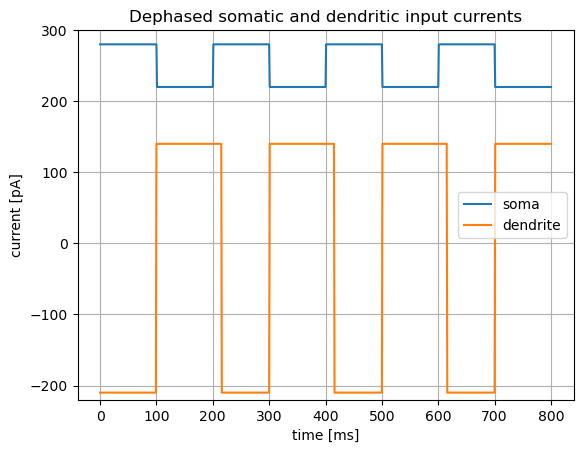

In [3]:
current_alt_dendrite_dephased = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=85, t_up=115, phase_lag=100)
current_alt_soma_dephased = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280*b2.pA, low_current=220*b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma_dephased, current2=current_alt_dendrite_dephased, label1="soma", label2="dendrite", title= "Dephased somatic and dendritic input currents", savefig=True)

In [4]:
state_monitor_dephased, spike_monitor_dephased = simulate_pyramidal_neuron_noisy(tau_s = TAU_s, tau_d = TAU_d, tau_ou = TAU_ou,
                                                                                 mu_s= mu_s, mu_d = mu_d, sigma_ou = sigma_ou, C_s = C_s, C_d = C_d, v_rest = E_L, b= b_w_s, v_spike = E_th, tau_w_s = TAU_w_s, tau_w_d = TAU_w_d, I_s_ext = current_alt_soma_dephased, I_d_ext = current_alt_dendrite_dephased, a = a_w_d, E_d = E_d, D_d = D_d, g_d = g_d, g_s = g_s, c_d = c_d,T_refractory = T_ref, nb_neurons = 4000, simulation_time=800*b2.ms)

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.24s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


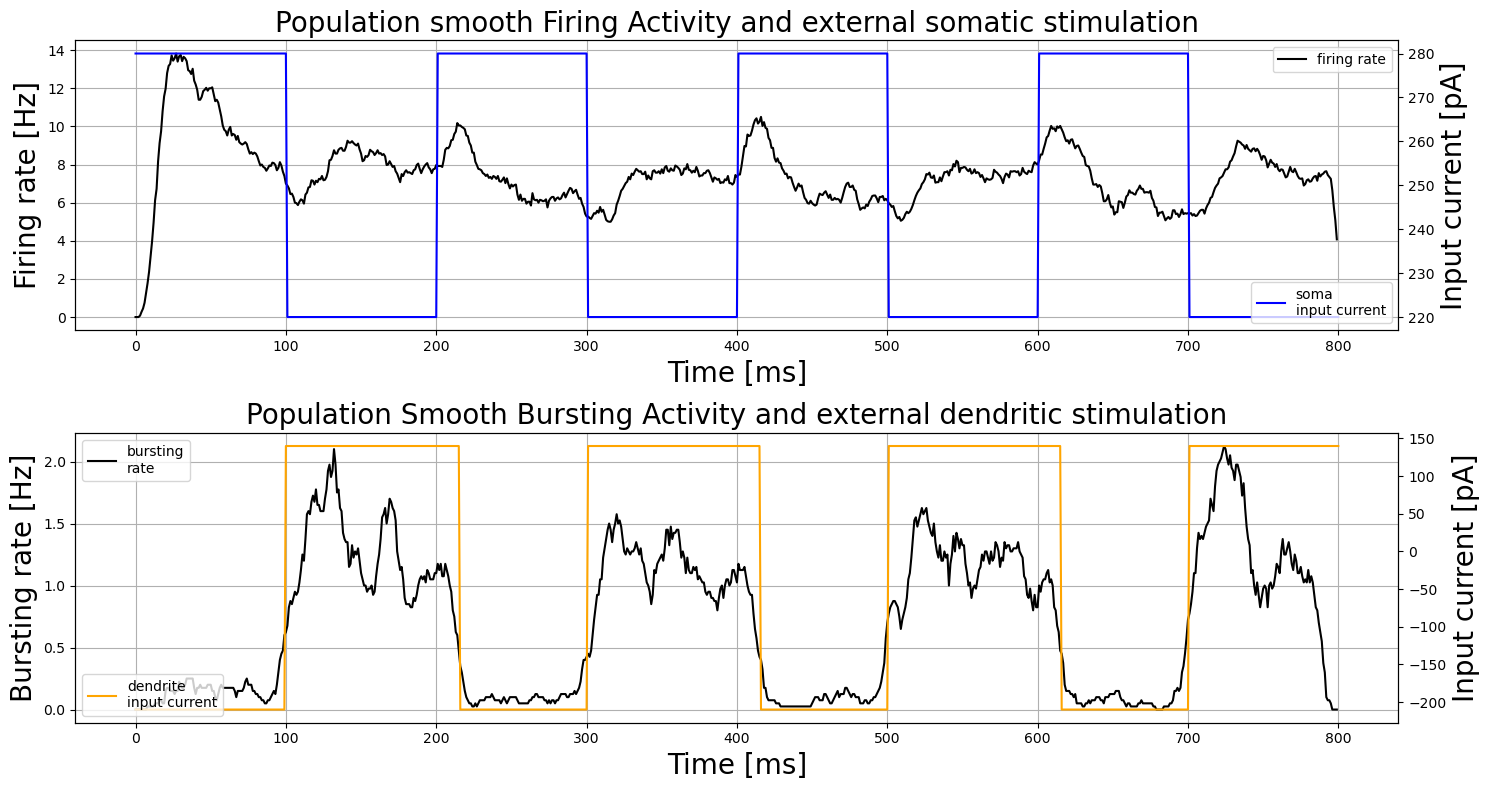

In [5]:
firing_rate_dephased, single_spike_rate_dephased, bursting_rate_dephased = compute_firing_and_burst_rate(spike_monitor_dephased)
plot_external_inputs_and_rates(firing_rate_dephased, bursting_rate_dephased, current_alt_soma_dephased, current_alt_dendrite_dephased, title= 'dephased_current_plot1', savefig=True)

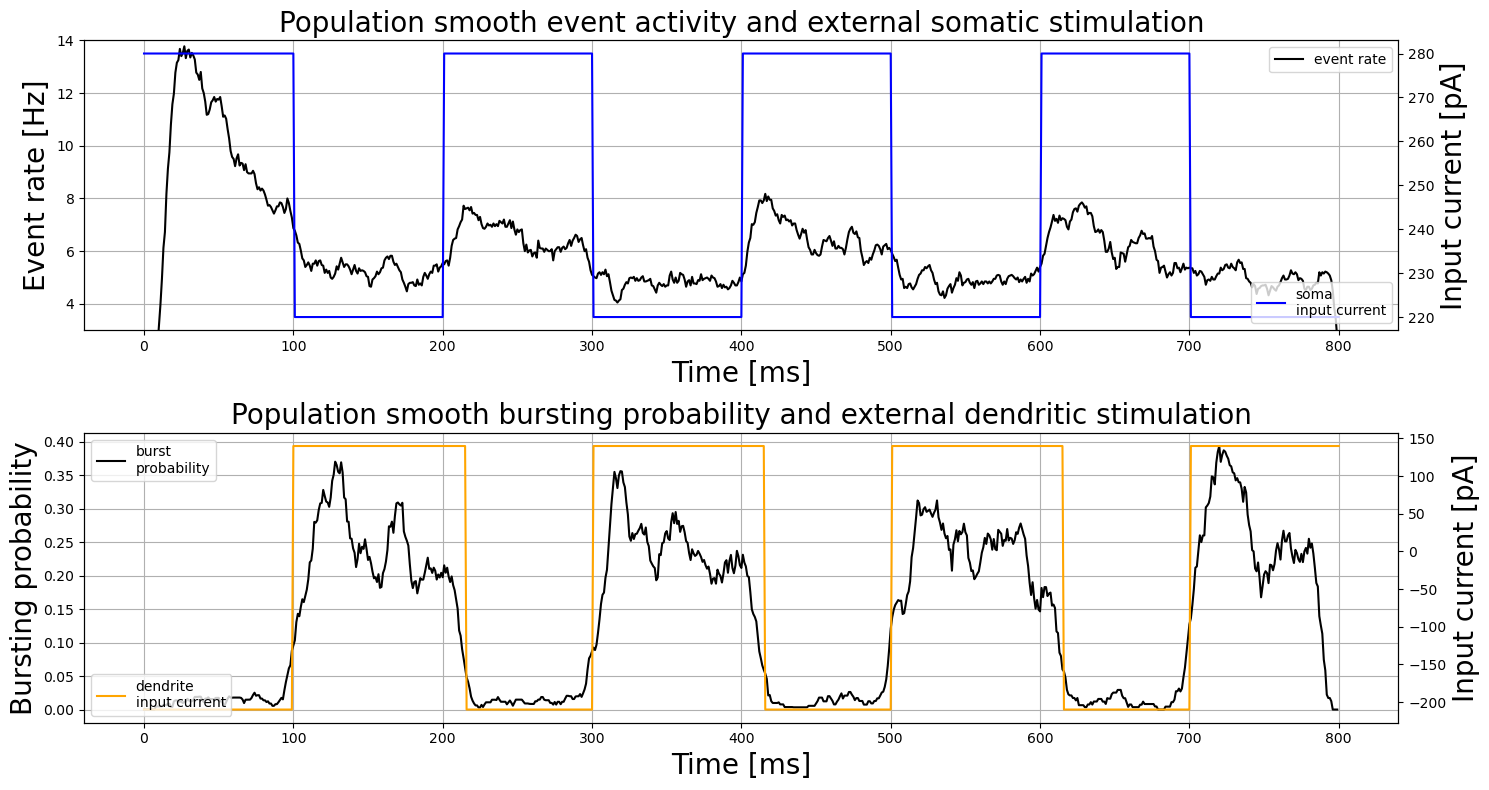

In [6]:
event_rate_dephased = compute_event_rate(bursting_rate_dephased, single_spike_rate_dephased)
burst_proba_dephased = compute_burst_proba(bursting_rate_dephased, event_rate_dephased)
plot_external_inputs_and_rates(event_rate_dephased, burst_proba_dephased, current_alt_soma_dephased, current_alt_dendrite_dephased, title= 'dephased_currents_plot2', isBurstProba=True, savefig=True, ylim=(3,14))

## Lower soma current

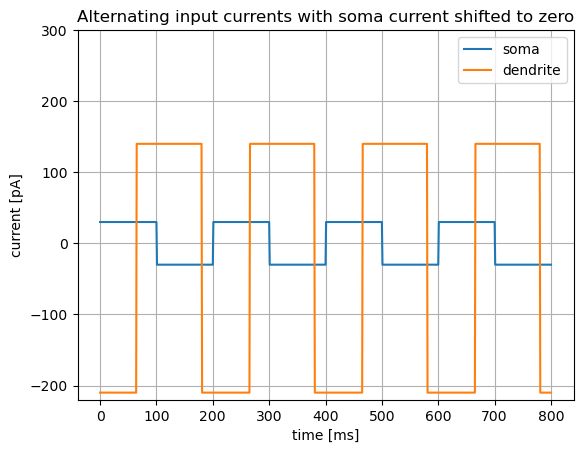

In [7]:
current_alt_dendrite = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=85, t_up=115, phase_lag=65)
current_alt_soma_down = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=30*b2.pA, low_current=-30*b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma_down, current2=current_alt_dendrite, label1="soma", label2="dendrite", title= "Alternating input currents with soma current shifted to zero", savefig=True)

In [8]:
state_monitor_soma_down, spike_monitor_soma_down = simulate_pyramidal_neuron_noisy(tau_s = TAU_s, tau_d = TAU_d, tau_ou = TAU_ou, mu_s = mu_s, mu_d = mu_d, sigma_ou = sigma_ou, C_s = C_s, C_d = C_d, v_rest = E_L, b= b_w_s, v_spike = E_th, tau_w_s = TAU_w_s, tau_w_d = TAU_w_d, I_s_ext = current_alt_soma_down, I_d_ext = current_alt_dendrite, a = a_w_d, E_d = E_d, D_d = D_d, g_d = g_d, g_s = g_s, c_d = c_d,T_refractory = T_ref, nb_neurons = 4000, simulation_time=800*b2.ms)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.09s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
WARNING    neurongroup_1's variable 't_p' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]


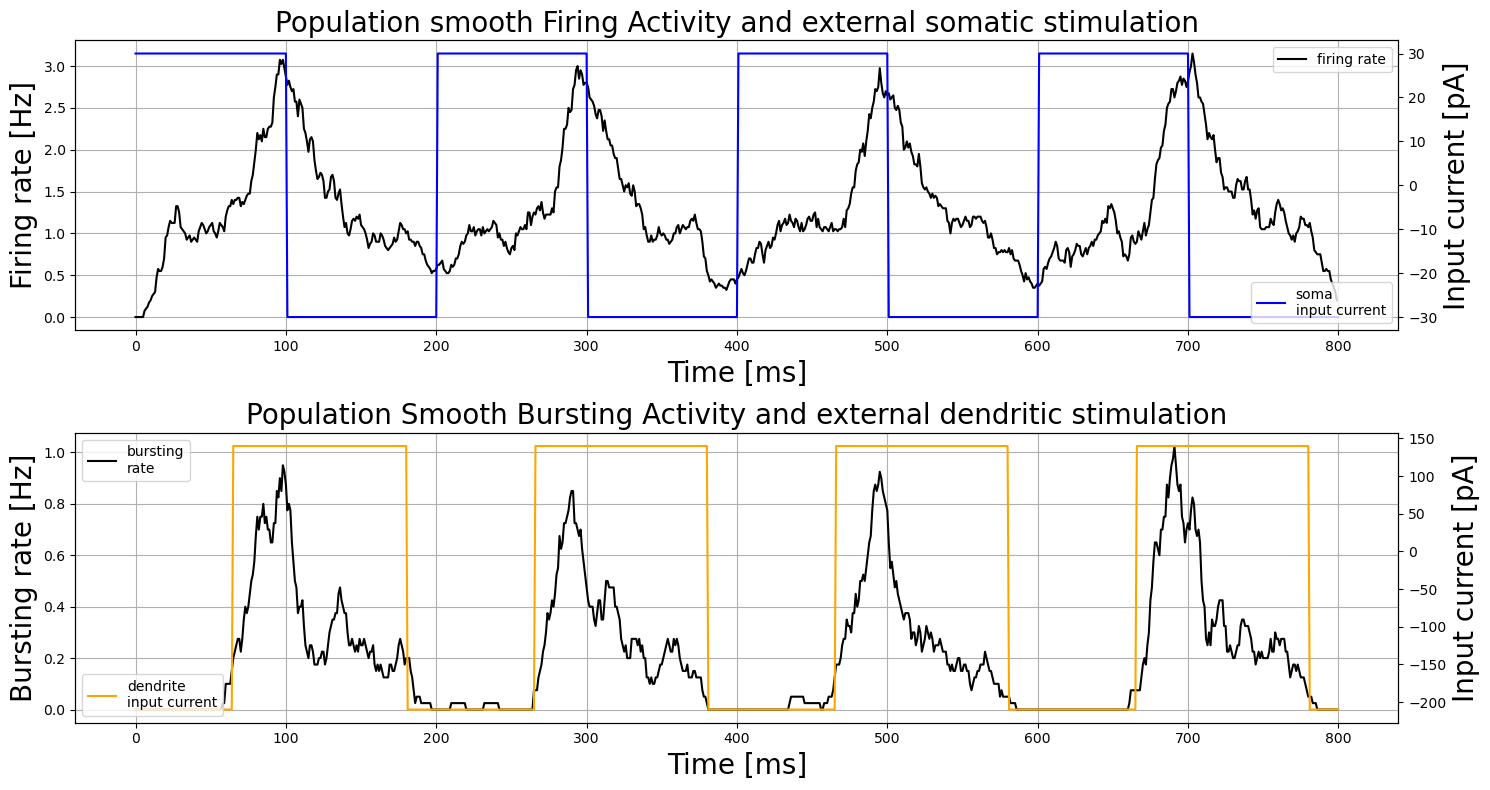

In [9]:
firing_rate_soma_down, single_spike_rate_down, bursting_rate_soma_down = compute_firing_and_burst_rate(spike_monitor_soma_down)
plot_external_inputs_and_rates(firing_rate_soma_down, bursting_rate_soma_down, current_alt_soma_down
                               , current_alt_dendrite, title= 'lower_soma_current_plot1', savefig=True)

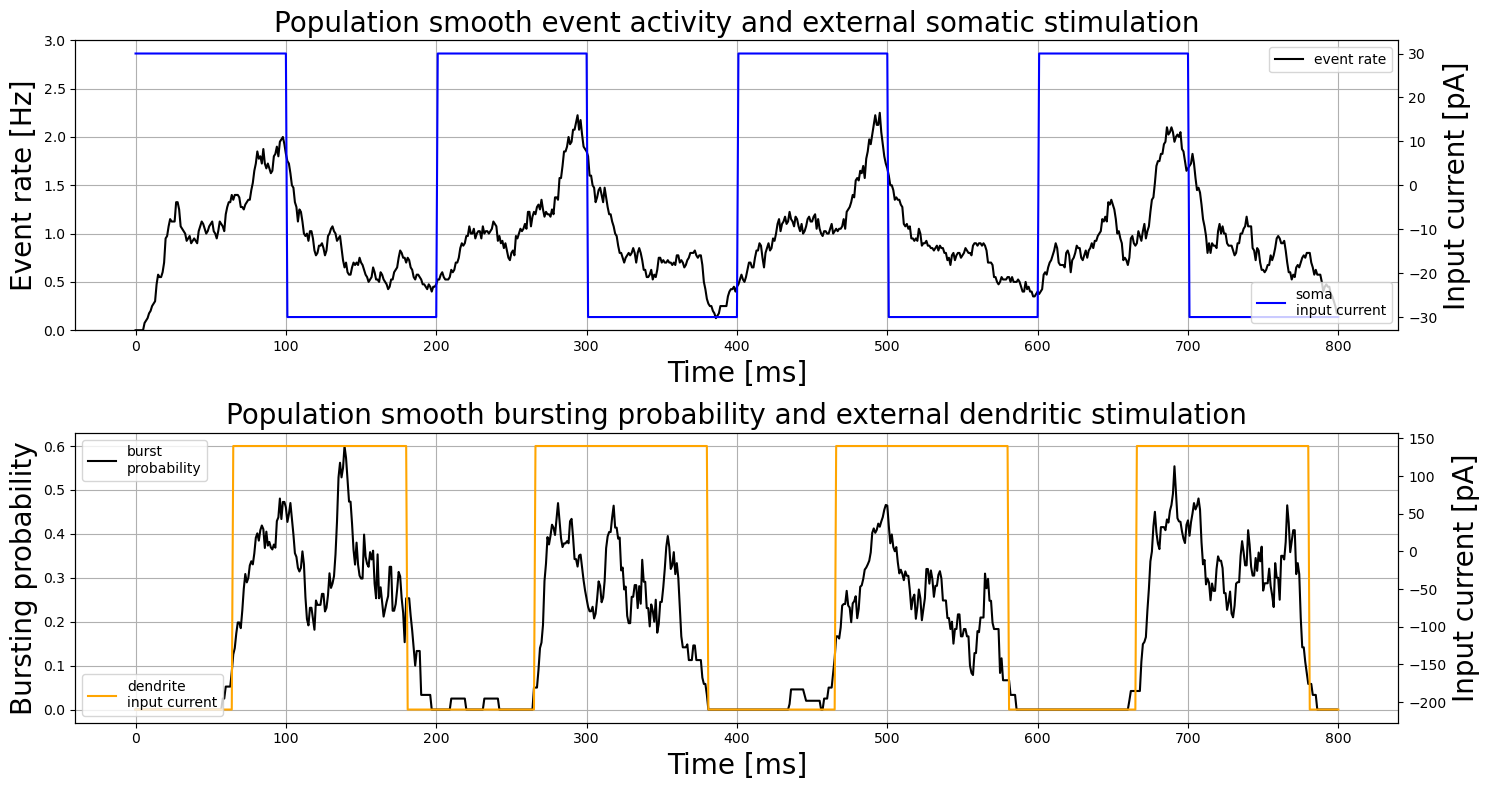

In [10]:
event_rate_soma_down = compute_event_rate(bursting_rate_soma_down, single_spike_rate_down)
burst_proba_soma_down = compute_burst_proba(bursting_rate_soma_down, event_rate_soma_down)
plot_external_inputs_and_rates(event_rate_soma_down, burst_proba_soma_down, current_alt_soma_down, current_alt_dendrite, title= 'lower_soma_current_plot2', isBurstProba=True, savefig=True, ylim = (0,3))

# Shorter period for both current

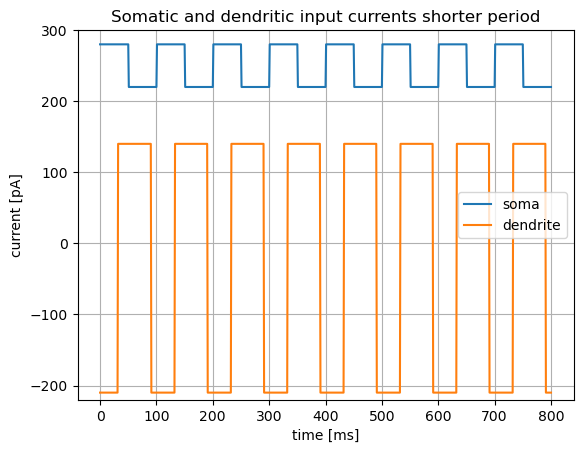

In [11]:
current_alt_dendrite_short = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=42, t_up=58, phase_lag=32)
current_alt_soma_short = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280*b2.pA, low_current=220*b2.pA, t_down=50, t_up=50)
plot_alternating_currents(current1=current_alt_soma_short, current2=current_alt_dendrite_short, label1="soma", label2="dendrite", title= "Somatic and dendritic input currents shorter period", savefig=True)

In [13]:
state_monitor_short, spike_monitor_short = simulate_pyramidal_neuron_noisy(tau_s = TAU_s, tau_d = TAU_d, tau_ou = TAU_ou,
mu_s = mu_s, mu_d = mu_d, sigma_ou = sigma_ou, C_s = C_s, C_d = C_d, v_rest = E_L, b = b_w_s, v_spike = E_th, tau_w_s = TAU_w_s, tau_w_d = TAU_w_d, I_s_ext = current_alt_soma_short, I_d_ext = current_alt_dendrite_short, a = a_w_d, E_d = E_d, D_d = D_d, g_d = g_d, g_s = g_s, c_d = c_d, T_refractory = T_ref, nb_neurons = 4000, simulation_time = 800 * b2.ms)

INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.06s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


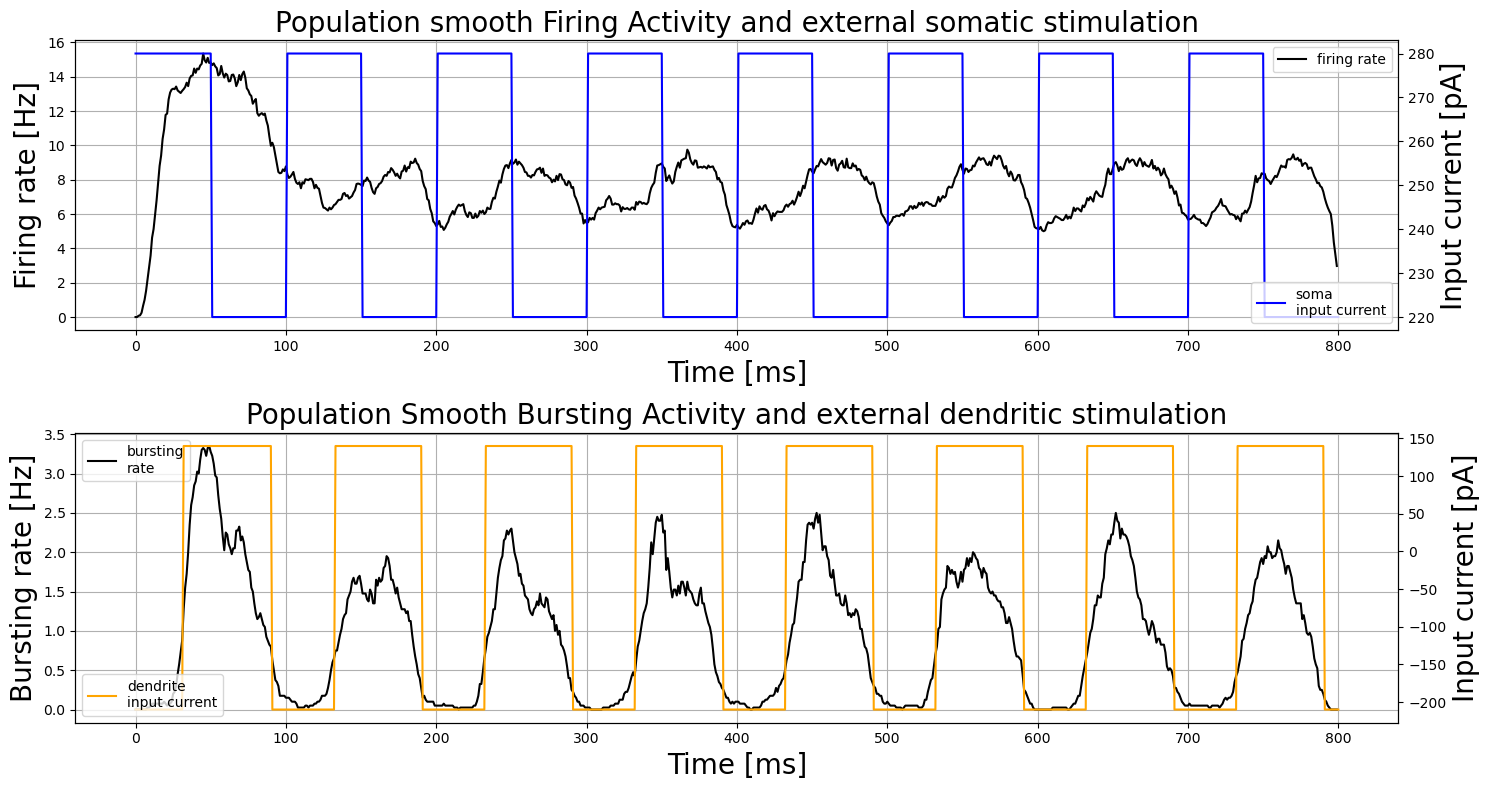

In [14]:
firing_rate_short, single_spike_rate_short, bursting_rate_short = compute_firing_and_burst_rate(spike_monitor_short)
plot_external_inputs_and_rates(firing_rate_short, bursting_rate_short, current_alt_soma_short
                               , current_alt_dendrite_short, title= 'short_period_current_plot1', savefig=True)

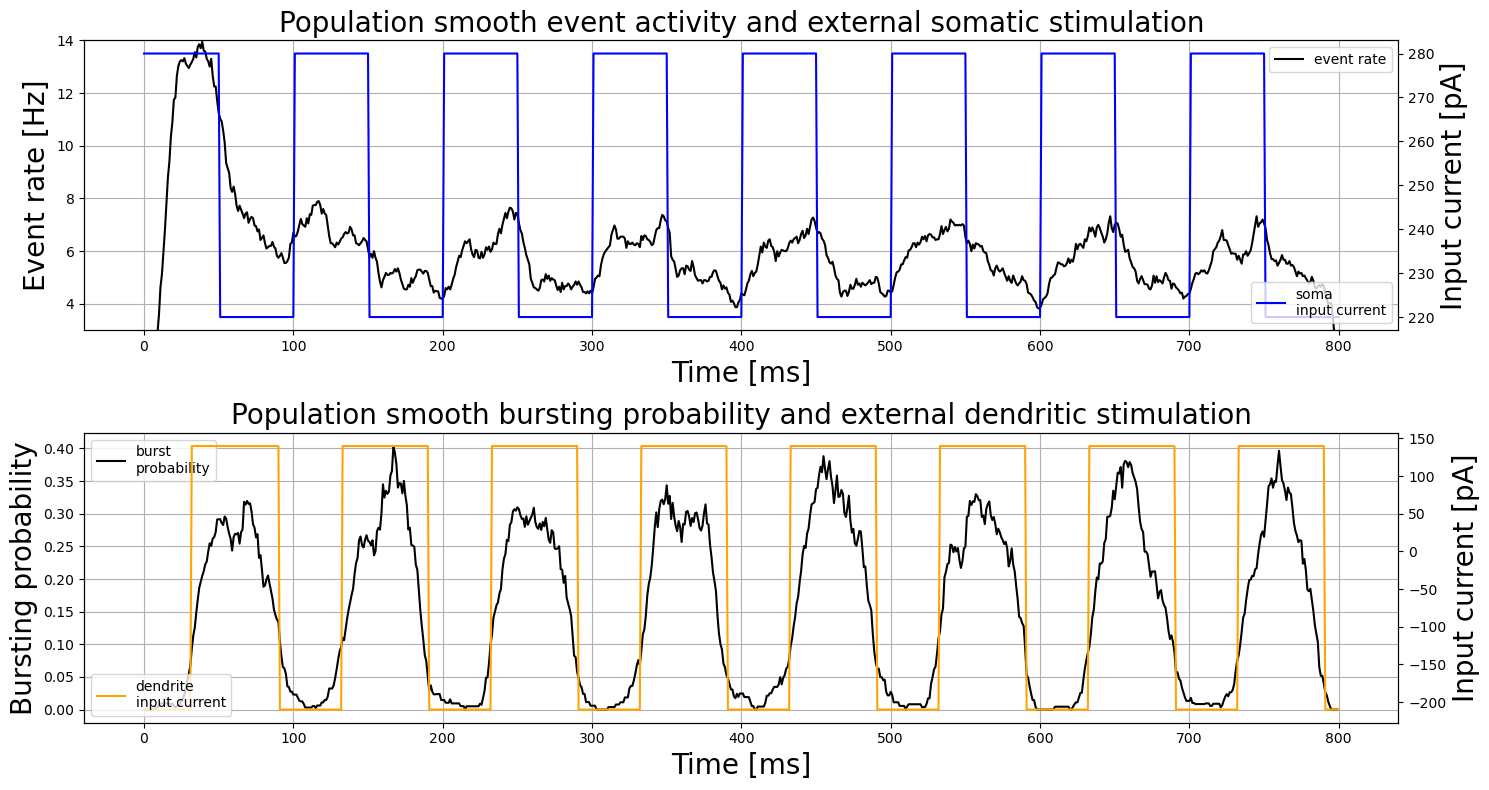

In [15]:
event_rate_short = compute_event_rate(bursting_rate_short, single_spike_rate_short)
burst_proba_short = compute_burst_proba(bursting_rate_short, event_rate_short)
plot_external_inputs_and_rates(event_rate_short, burst_proba_short, current_alt_soma_short, current_alt_dendrite_short, title= 'short_period_currents_plot2', isBurstProba=True, savefig=True, ylim=(3,14))

# Different periods


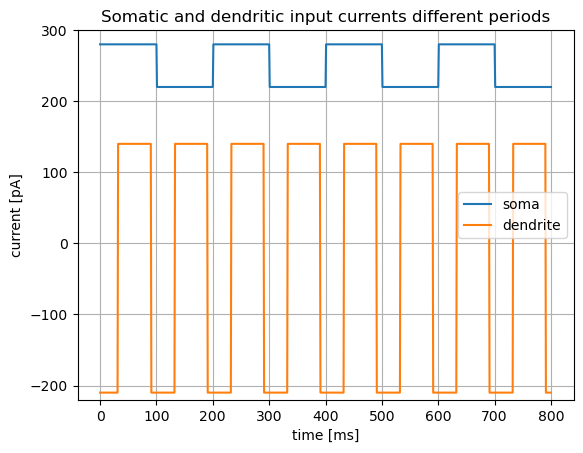

In [22]:
current_alt_dendrite = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=85, t_up=115, phase_lag=65)
current_alt_dendrite_short = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=42, t_up=58, phase_lag=32)
current_alt_soma_short = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280*b2.pA, low_current=220*b2.pA, t_down=50, t_up=50)
current_alt_soma = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280*b2.pA, low_current=220*b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma, current2=current_alt_dendrite_short, label1="soma", label2="dendrite", title= "Somatic and dendritic input currents different periods", savefig=True)

In [19]:
state_monitor_2periods, spike_monitor_2periods = simulate_pyramidal_neuron_noisy(tau_s = TAU_s, tau_d = TAU_d, tau_ou = TAU_ou,
mu_s = mu_s, mu_d = mu_d, sigma_ou = sigma_ou, C_s = C_s, C_d = C_d, v_rest = E_L, b = b_w_s, v_spike = E_th, tau_w_s = TAU_w_s, tau_w_d = TAU_w_d, I_s_ext = current_alt_soma, I_d_ext = current_alt_dendrite_short, a = a_w_d, E_d = E_d, D_d = D_d, g_d = g_d, g_s = g_s, c_d = c_d, T_refractory = T_ref, nb_neurons = 4000, simulation_time = 800 * b2.ms)

INFO       No numerical integration method specified for group 'neurongroup_4', using method 'euler' (took 0.07s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


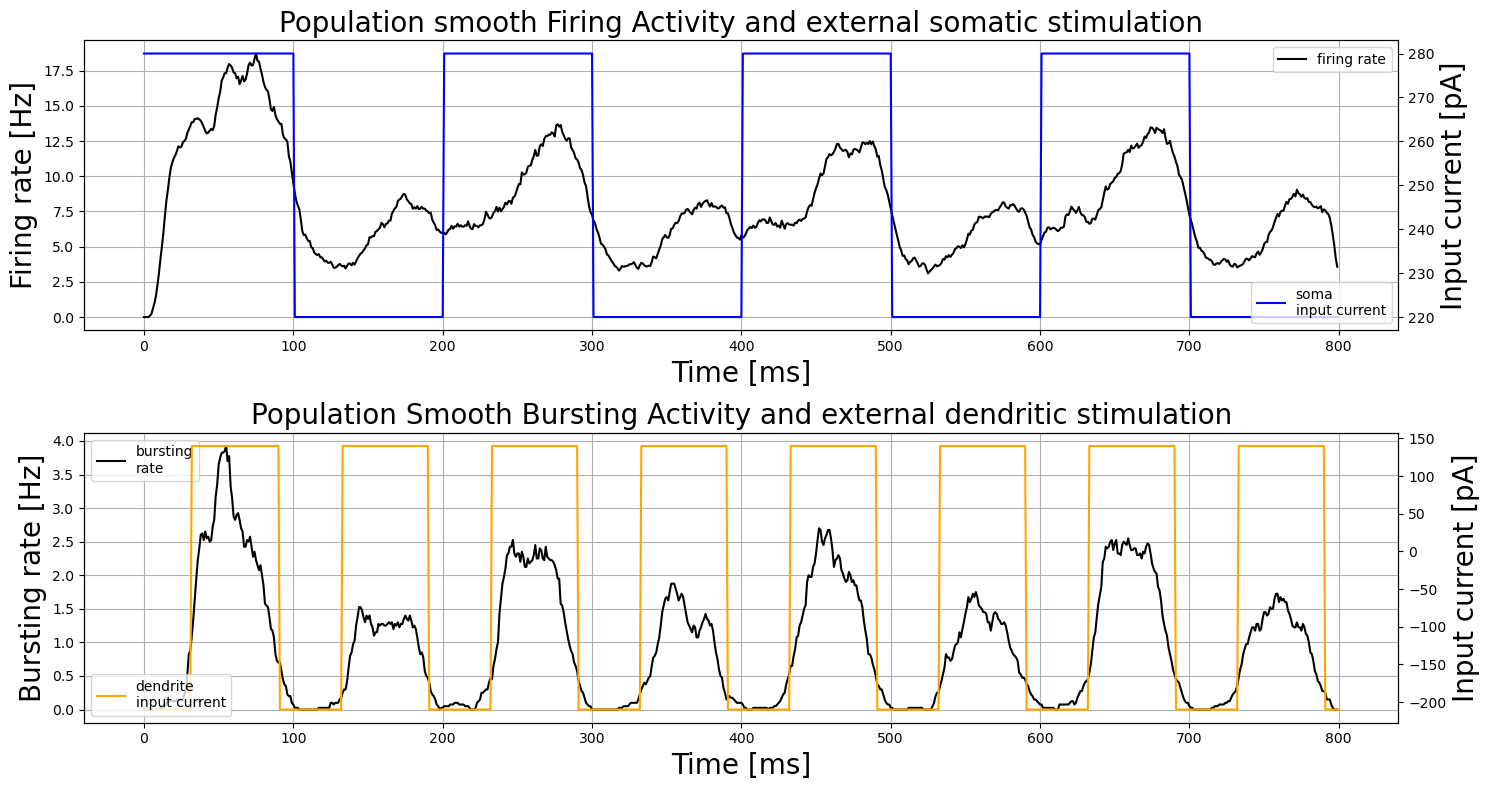

In [20]:
firing_rate_2periods, single_spike_rate_2periods, bursting_rate_2periods = compute_firing_and_burst_rate(spike_monitor_2periods)
plot_external_inputs_and_rates(firing_rate_2periods, bursting_rate_2periods, current_alt_soma
                               , current_alt_dendrite_short, title= 'diff_periods_plot1', savefig=True)

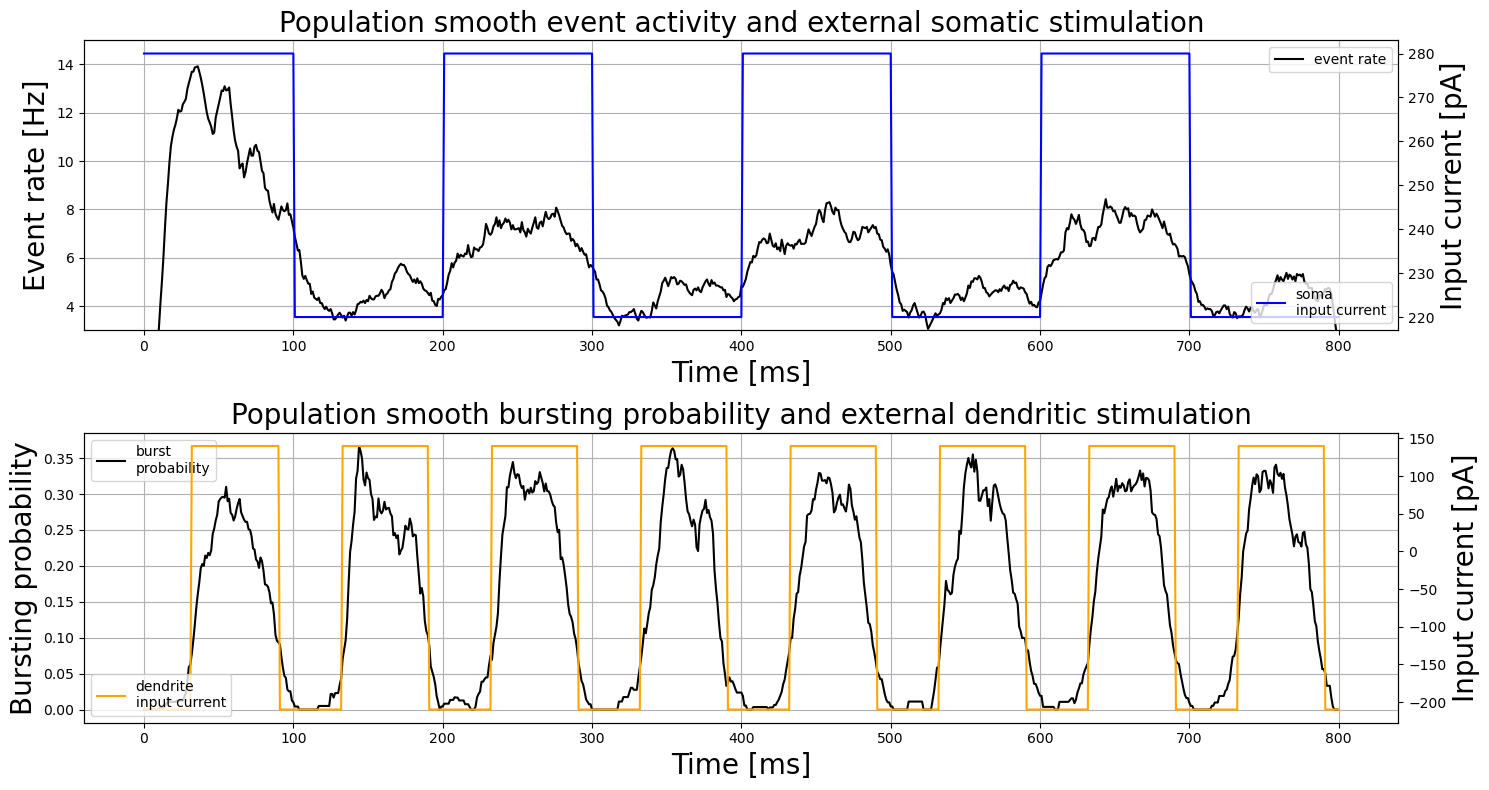

In [21]:
event_rate_2periods = compute_event_rate(bursting_rate_2periods, single_spike_rate_2periods)
burst_proba_2periods = compute_burst_proba(bursting_rate_2periods, event_rate_2periods)
plot_external_inputs_and_rates(event_rate_2periods, burst_proba_2periods, current_alt_soma, current_alt_dendrite_short, title= 'diff_periods_plot2', isBurstProba=True, savefig=True, ylim=(3,15))

# Small dendrite current

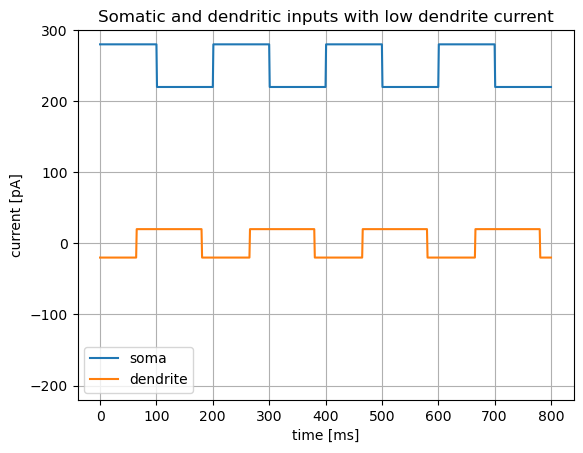

In [4]:
current_alt_dendrite_low = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-20*b2.pA, high_current=20*b2.pA, t_down=85, t_up=115, phase_lag=65)
current_alt_soma = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280*b2.pA, low_current=220*b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma, current2=current_alt_dendrite_low, label1="soma", label2="dendrite", title= "Somatic and dendritic inputs with low dendrite current", savefig=True)

In [5]:
state_monitor_low_d, spike_monitor_low_d = simulate_pyramidal_neuron_noisy(tau_s=TAU_s, tau_d=TAU_d, tau_ou=TAU_ou,
                                                                           mu_s=mu_s, mu_d=mu_d, sigma_ou=sigma_ou,
                                                                           C_s=C_s, C_d=C_d, v_rest=E_L, b=b_w_s,
                                                                           v_spike=E_th, tau_w_s=TAU_w_s,
                                                                           tau_w_d=TAU_w_d, I_s_ext=current_alt_soma,
                                                                           I_d_ext=current_alt_dendrite_low, a=a_w_d,
                                                                           E_d=E_d, D_d=D_d, g_d=g_d, g_s=g_s, c_d=c_d,
                                                                           T_refractory=T_ref, nb_neurons=4000,
                                                                           simulation_time=800 * b2.ms)

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.28s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


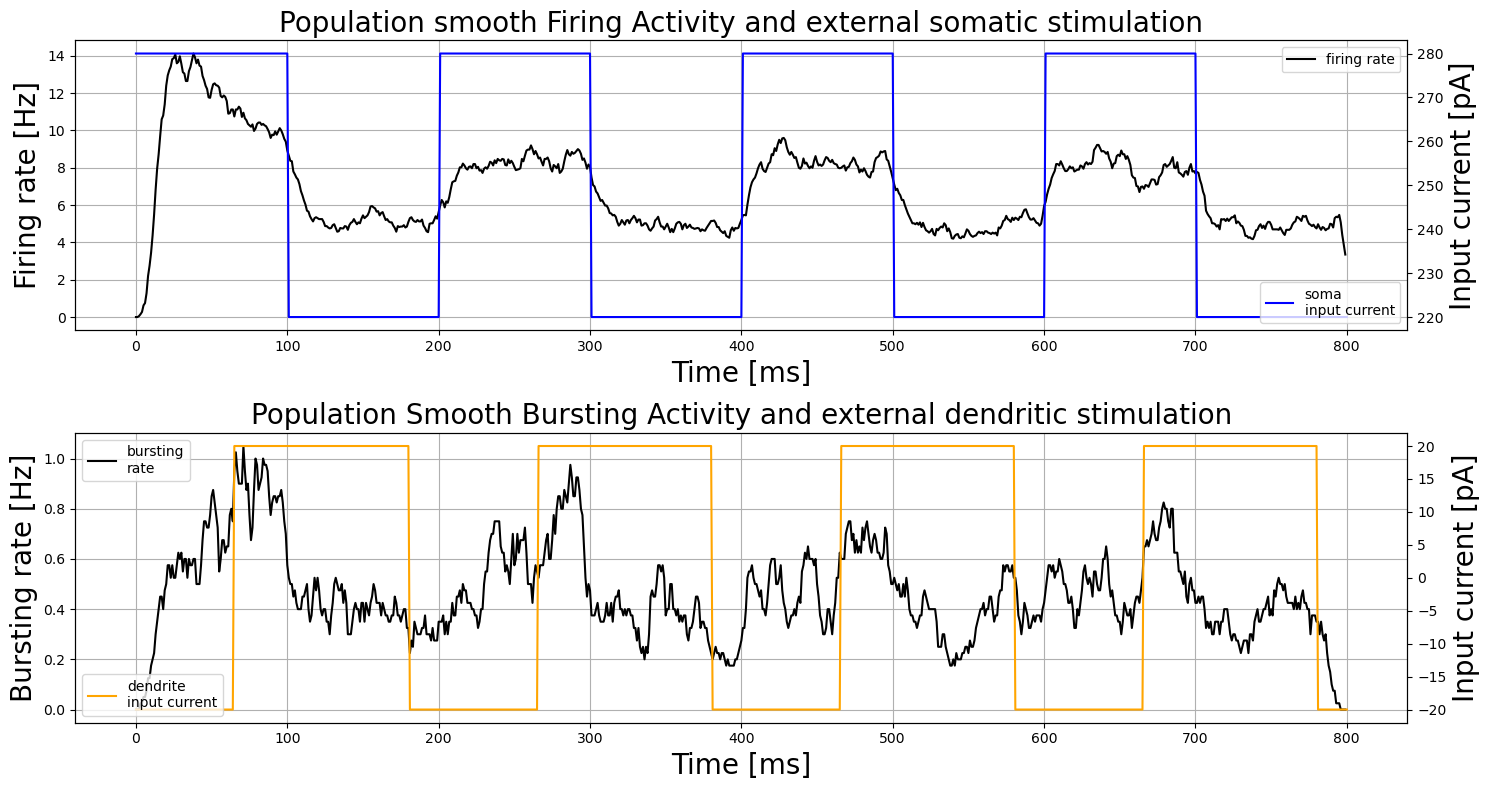

In [6]:
firing_rate_low_d, single_spike_rate_low_d, bursting_rate_low_d = compute_firing_and_burst_rate(spike_monitor_low_d)
plot_external_inputs_and_rates(firing_rate_low_d, bursting_rate_low_d, current_alt_soma
                               , current_alt_dendrite_low, title= 'low_dendrite_plot1', savefig=True)

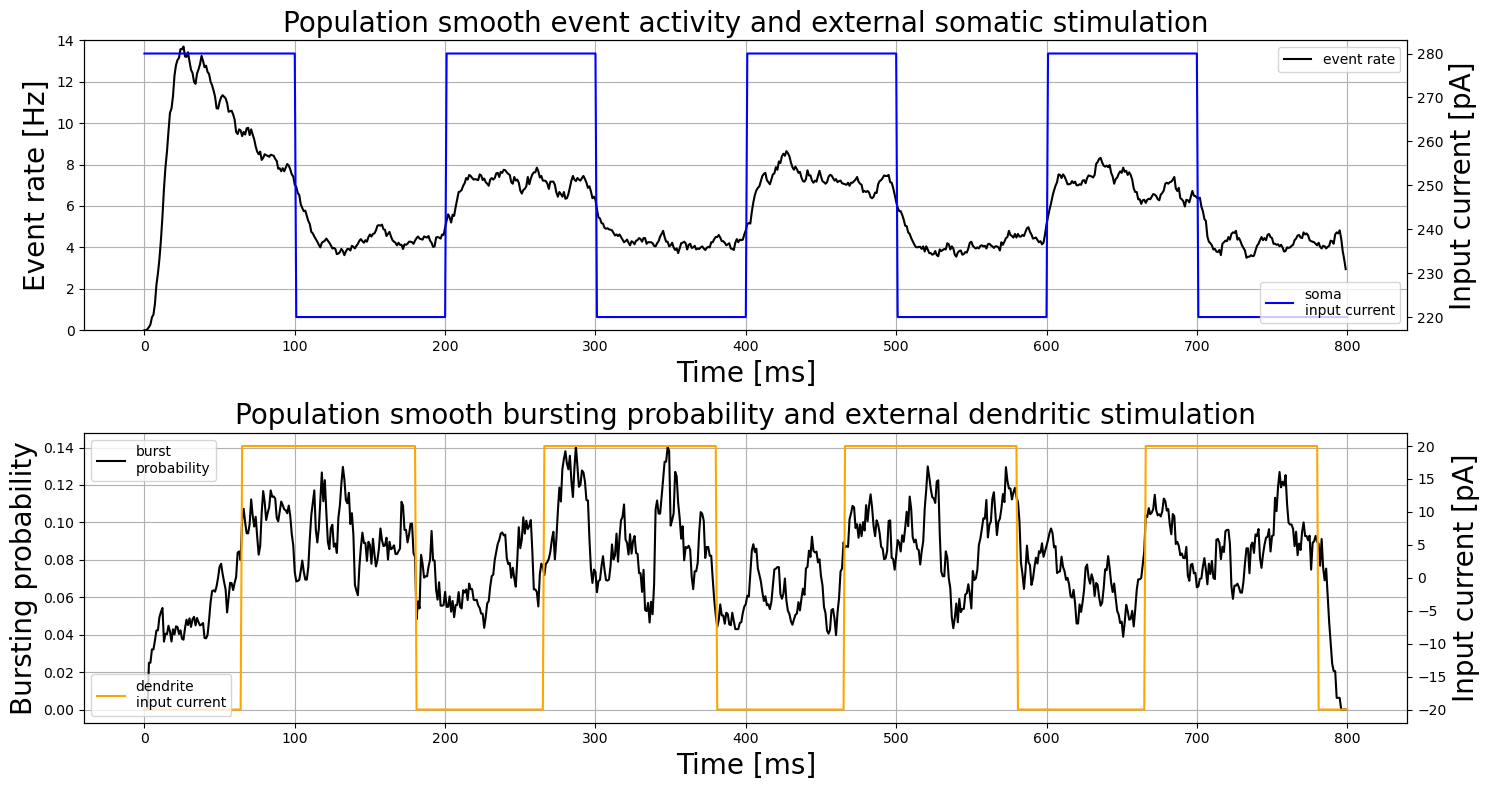

In [8]:
event_rate_low_d = compute_event_rate(bursting_rate_low_d, single_spike_rate_low_d)
burst_proba_low_d = compute_burst_proba(bursting_rate_low_d, event_rate_low_d)
plot_external_inputs_and_rates(event_rate_low_d, burst_proba_low_d, current_alt_soma, current_alt_dendrite_low, title= 'low_dendrite_plot2', isBurstProba=True, savefig=True, ylim = (0,14))

# Low dendrite current, high soma

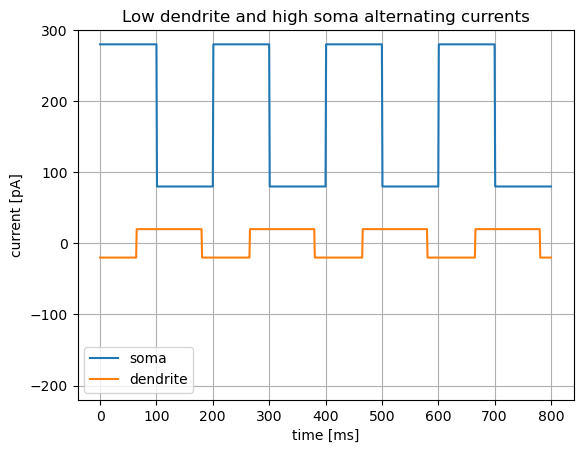

In [9]:
current_alt_dendrite_low = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-20 * b2.pA,
                                                   high_current=20 * b2.pA, t_down=85, t_up=115, phase_lag=65)
current_alt_soma_high = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280 * b2.pA,
                                           low_current=80 * b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma_high, current2=current_alt_dendrite_low, label1="soma",
                          label2="dendrite", title="Low dendrite and high soma alternating currents", savefig=True)

In [10]:
state_monitor_low_d, spike_monitor_low_d = simulate_pyramidal_neuron_noisy(tau_s=TAU_s, tau_d=TAU_d, tau_ou=TAU_ou,
                                                                           mu_s=mu_s, mu_d=mu_d, sigma_ou=sigma_ou,
                                                                           C_s=C_s, C_d=C_d, v_rest=E_L, b=b_w_s,
                                                                           v_spike=E_th, tau_w_s=TAU_w_s,
                                                                           tau_w_d=TAU_w_d, I_s_ext=current_alt_soma_high,
                                                                           I_d_ext=current_alt_dendrite_low, a=a_w_d,
                                                                           E_d=E_d, D_d=D_d, g_d=g_d, g_s=g_s, c_d=c_d,
                                                                           T_refractory=T_ref, nb_neurons=4000,
                                                                           simulation_time=800 * b2.ms)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


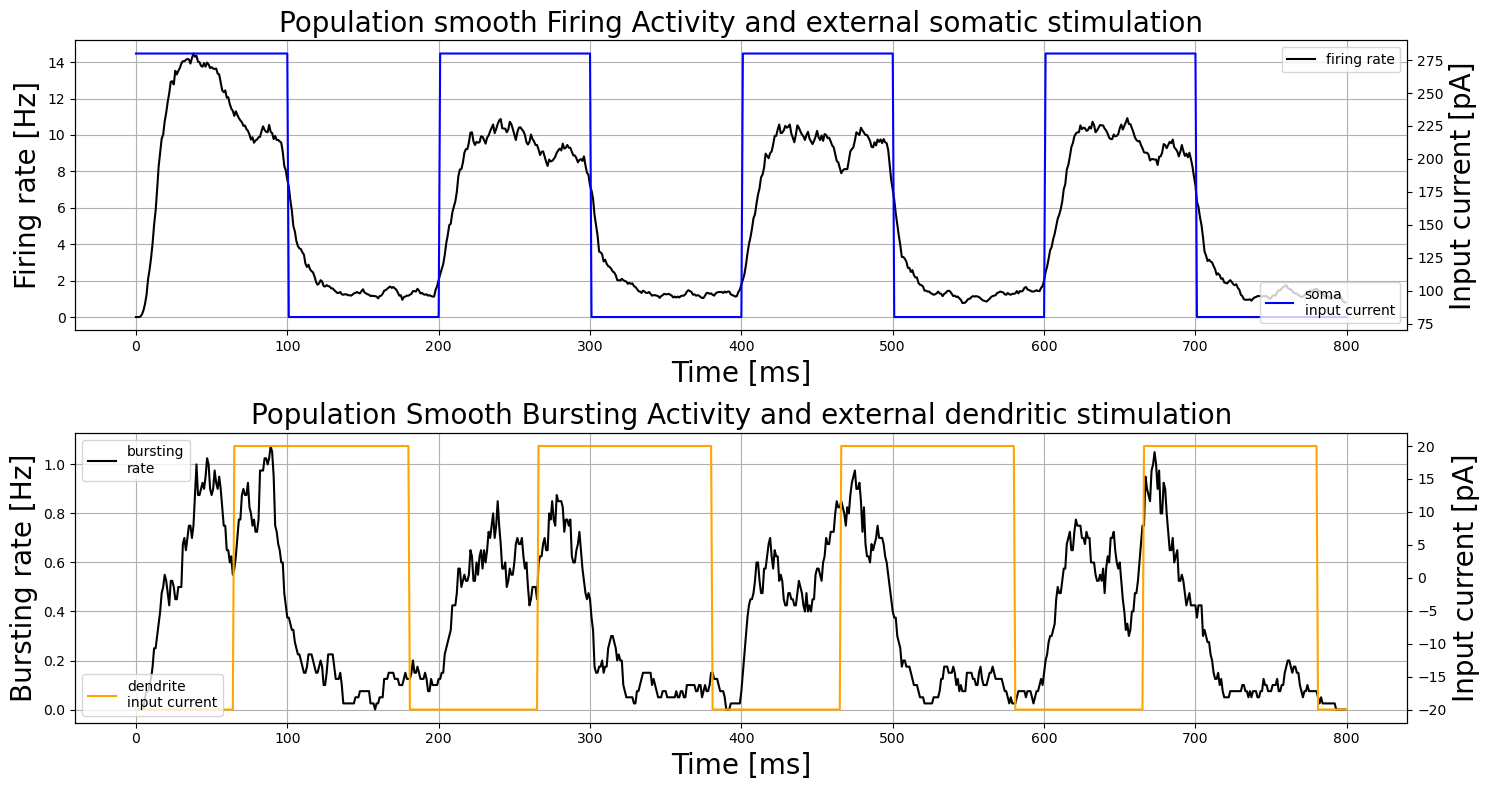

In [11]:
firing_rate_low_d, single_spike_rate_low_d, bursting_rate_low_d = compute_firing_and_burst_rate(spike_monitor_low_d)
plot_external_inputs_and_rates(firing_rate_low_d, bursting_rate_low_d, current_alt_soma_high
                               , current_alt_dendrite_low, title= 'Low_dendrite_high_soma_plot1', savefig=True)

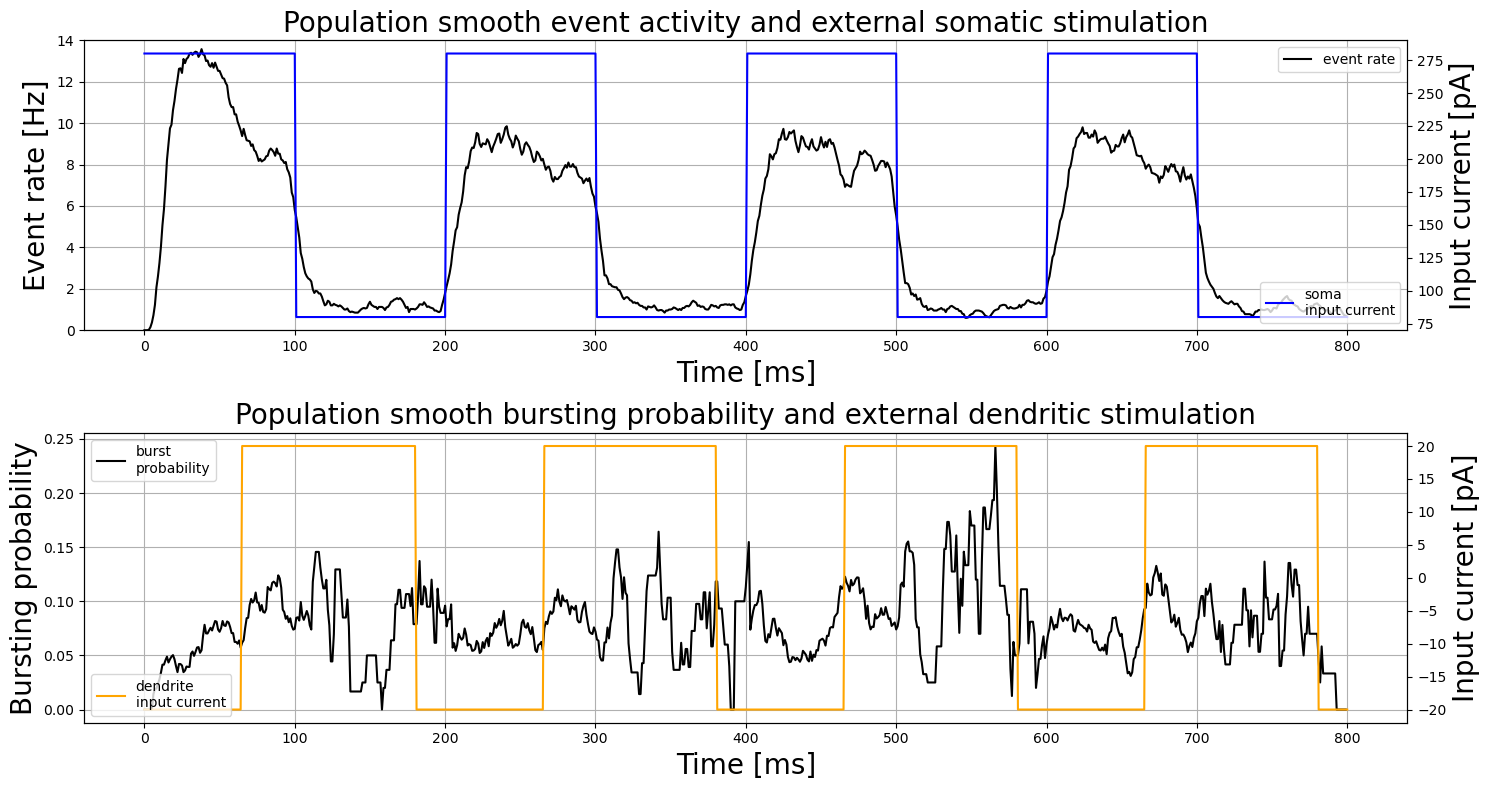

In [12]:
event_rate_low_d = compute_event_rate(bursting_rate_low_d, single_spike_rate_low_d)
burst_proba_low_d = compute_burst_proba(bursting_rate_low_d, event_rate_low_d)
plot_external_inputs_and_rates(event_rate_low_d, burst_proba_low_d, current_alt_soma_high, current_alt_dendrite_low, title= 'Low_dendrite_high_soma_plot2', isBurstProba=True, savefig=True, ylim=(0,14))

### High Soma and Dendrite


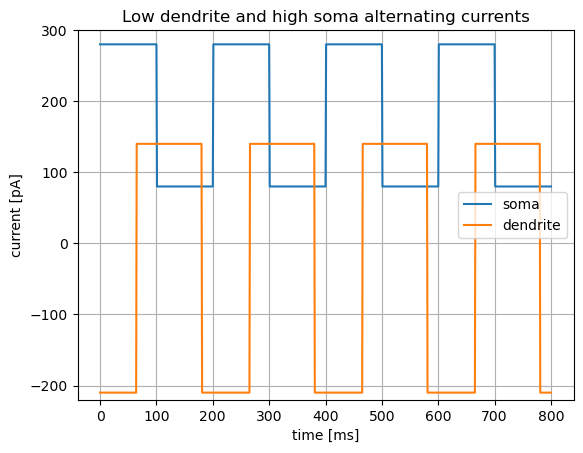

In [13]:
current_alt_dendrite = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, low_current=-210*b2.pA, high_current=140*b2.pA, t_down=85, t_up=115, phase_lag=65)

current_alt_soma_high = get_alternating_current(t_start=0, t_end=800, unit_time=b2.ms, high_current=280 * b2.pA,
                                           low_current=80 * b2.pA, t_down=100, t_up=100)
plot_alternating_currents(current1=current_alt_soma_high, current2=current_alt_dendrite, label1="soma",
                          label2="dendrite", title="Low dendrite and high soma alternating currents", savefig=True)

In [16]:
state_monitor_low_d, spike_monitor_low_d = simulate_pyramidal_neuron_noisy(tau_s=TAU_s, tau_d=TAU_d, tau_ou=TAU_ou,
                                                                           mu_s=mu_s, mu_d=mu_d, sigma_ou=sigma_ou,
                                                                           C_s=C_s, C_d=C_d, v_rest=E_L, b=b_w_s,
                                                                           v_spike=E_th, tau_w_s=TAU_w_s,
                                                                           tau_w_d=TAU_w_d, I_s_ext=current_alt_soma_high,
                                                                           I_d_ext=current_alt_dendrite, a=a_w_d,
                                                                           E_d=E_d, D_d=D_d, g_d=g_d, g_s=g_s, c_d=c_d,
                                                                           T_refractory=T_ref, nb_neurons=4000,
                                                                           simulation_time=800 * b2.ms)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
WARNING    neurongroup_1's variable 't_p' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]


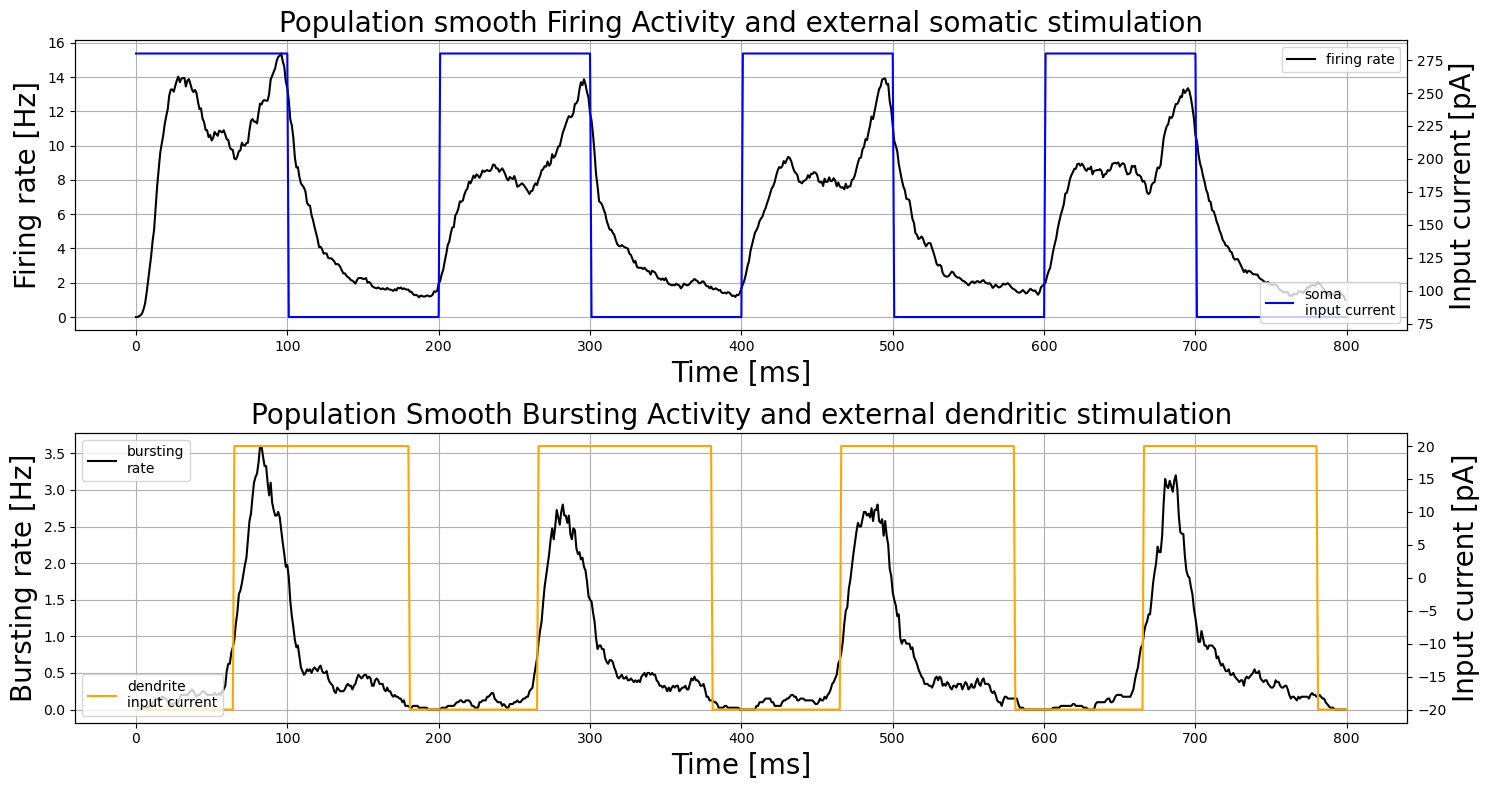

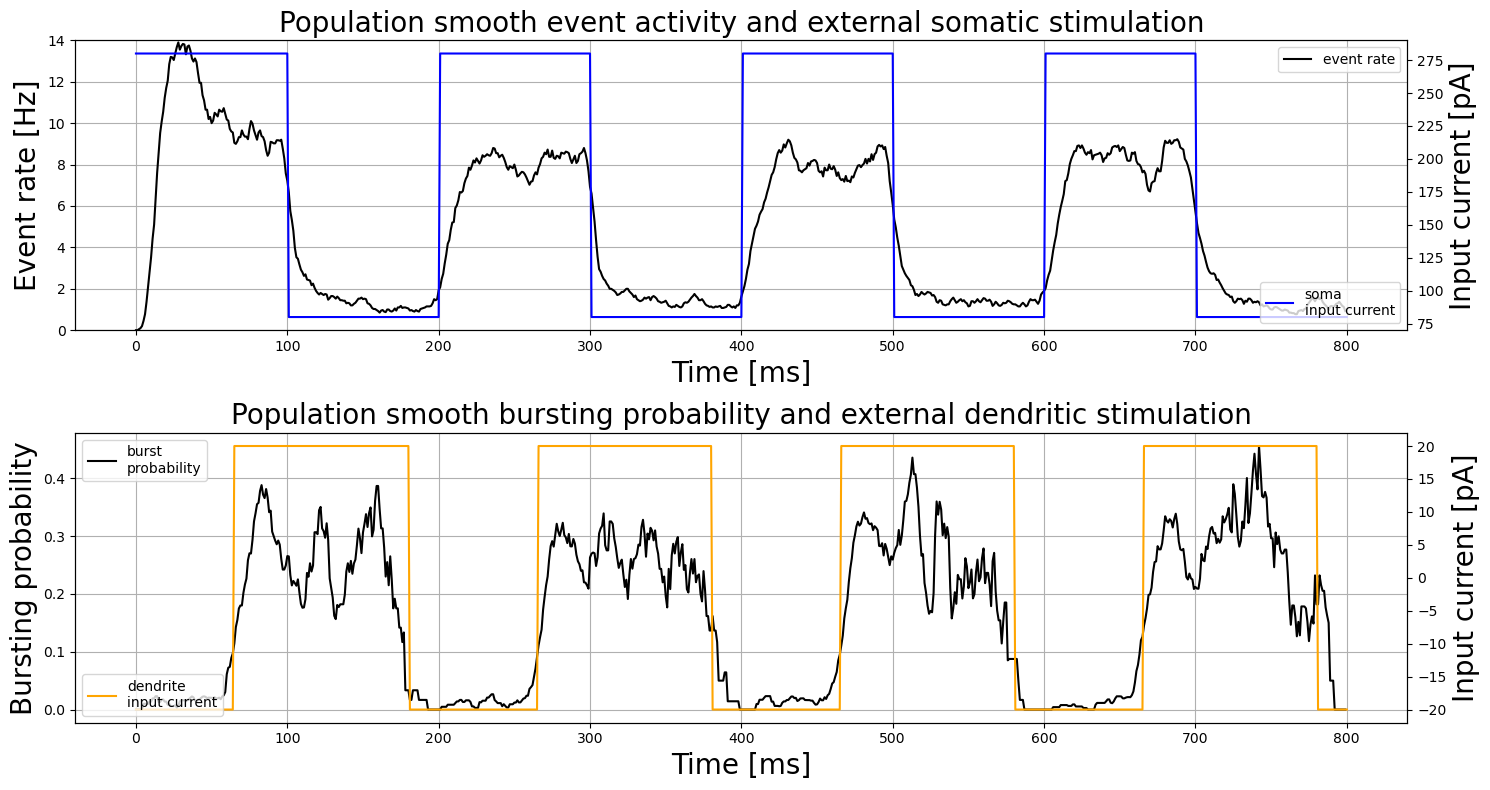

In [18]:
firing_rate_low_d, single_spike_rate_low_d, bursting_rate_low_d = compute_firing_and_burst_rate(spike_monitor_low_d)
plot_external_inputs_and_rates(firing_rate_low_d, bursting_rate_low_d, current_alt_soma_high
                               , current_alt_dendrite_low, title= 'high_both_plot1', savefig=True)

event_rate_low_d = compute_event_rate(bursting_rate_low_d, single_spike_rate_low_d)
burst_proba_low_d = compute_burst_proba(bursting_rate_low_d, event_rate_low_d)
plot_external_inputs_and_rates(event_rate_low_d, burst_proba_low_d, current_alt_soma_high, current_alt_dendrite_low, title= 'high_both_plot2', isBurstProba=True, savefig=True, ylim=(0,14))